# Task 1: Data Preparation

In [1]:
import pandas as pd
Engine_offline="Engine CC.csv"

Female_offline="Female.csv"

Fuel_offline="Fuel.csv"

Male_offline="Male.csv"

Manufacturer_offline="Manufacturer.csv"

Model_offline="Model.csv"

Power_offline="Power.csv"

Price_offline="Price.csv"

Total_offline="Total.csv"

Transmission_offline="Transmission.csv"

Unknown_offline="Unknown.csv"

In [2]:
Engine_df= pd.read_csv(Engine_offline, sep=',', decimal='.',
header=0)
Female_df= pd.read_csv(Female_offline, sep=',', decimal='.',
header=0)
Fuel_df= pd.read_csv(Fuel_offline, sep=',', decimal='.',
header=0)
Male_df= pd.read_csv(Male_offline, sep=',', decimal='.',
header=0)
Manufacturer_df= pd.read_csv(Manufacturer_offline, sep=',', decimal='.',
header=0)
Model_df= pd.read_csv(Model_offline, sep=',', decimal='.',
header=0)
Price_df= pd.read_csv(Price_offline, sep=',', decimal='.',
header=0)
Power_df= pd.read_csv(Power_offline, sep=',', decimal='.',
header=0)
Total_df= pd.read_csv(Total_offline, sep=',', decimal='.',
header=0)
Transmission_df= pd.read_csv(Transmission_offline, sep=',', decimal='.',
header=0)
Unknown_df= pd.read_csv(Unknown_offline, sep=',', decimal='.',
header=0)


In [3]:
a=pd.merge(Female_df,Fuel_df)

In [4]:
b=pd.merge(Engine_df,a)

In [5]:
c=pd.merge(b,Male_df)

In [6]:
d=pd.merge(c,Manufacturer_df)

In [7]:
e=pd.merge(d,Model_df)

In [8]:
f=pd.merge(e,Price_df)

In [9]:
g=pd.merge(f,Power_df)

In [10]:
h=pd.merge(g,Total_df)

In [11]:
i=pd.merge(h,Transmission_df)

In [12]:
cleaned_car_buyers=pd.merge(i,Unknown_df)

In [13]:
cleaned_car_buyers 

,Unnamed: 0,Engine CC,Female,Fuel,Male,Manufacturer,Model,Price,Power,Total,Transmission,Unknown
0,0,1497.169492,422731,petrol,814172,Ford,Focus,30.619322,-94.033898,1293390,5.966102,"56,487"
1,1,1166.142857,631666,petrol,554879,Ford,Fiesta,18.532143,68.571429,1240602,5000.714286,"54,057"
2,2,1537.406593,310604,petrol,483216,Volkswagen,Golf,31.242154,-89.461538,841383,6.164835,"47,563"
3,3,1219.653846,312556,petrol,241287,Renault,Clio,22.100000,75.576923,581847,5.615385,"28,004"
4,4,1995.777778,115843,petrol,408016,BMW,320i,47.848370,126.111111,552984,6.444444,"29,125"
...,...,...,...,...,...,...,...,...,...,...,...,...
6097,6097,2304.975610,150,diesel,"1,012",Land-Rover,Defender,108.747195,207.609756,"1,242",7.853659,80
6098,6098,2261.193548,482,petrol,670,Toyota,RAV4,43.548516,137.774193,"1,218",1.354839,66
6099,6099,2696.500000,247,petrol,790,Alfa-Romeo,Spider,55.200000,163.500000,"1,118",6.000000,81
6100,6100,2254.000000,416,petrol,639,Honda,Shuttle,30.081000,110.000000,"1,104",4.000000,49


In [14]:
cleaned_car_buyers=cleaned_car_buyers.drop("Unnamed: 0",axis=1)

In [15]:
cleaned_car_buyers.to_csv('cleaned_car_buyers.csv',index=False)

In [16]:
cleaned_car_buyers['Model'].isnull().sum()

1

In [17]:
#Model has null value at 65, I found this manually

In [18]:
cleaned_car_buyers[['Model','Manufacturer']][cleaned_car_buyers.Manufacturer=='Ford']

,Model,Manufacturer
0,Focus,Ford
1,Fiesta,Ford
7,Mondeo,Ford
10,Ka+,Ford
23,Focus,Ford
...,...,...
5948,Mondeo,Ford
5949,Capri,Ford
6052,Scorpio,Ford
6056,Maverick,Ford


In [19]:
# Now I am going to fill it with ford as we have compared with the manufacturer and got to know that 
# it is a Ford brand

In [20]:
cleaned_car_buyers['Model'].fillna("Ford",inplace=True)

In [21]:
#  With the next step I am just checking whether the null value is filled 

In [22]:
cleaned_car_buyers['Model'].isnull().sum()

0

In [23]:
cleaned_car_buyers.iloc[65]

Engine CC        NaN
Female           NaN
Fuel             NaN
Male             NaN
Manufacturer    Ford
Model           Ford
Price            NaN
Power            NaN
Total            NaN
Transmission     NaN
Unknown          NaN
Name: 65, dtype: object

In [24]:
# I noticed in the row 65 most of the values are missing except the manufacturers hence, 
# I plan to drop this row as it will not be of use to me in future predictions. 
# Therefore, no significance in the data set too.

In [25]:
cleaned_car_buyers.drop([65],inplace=True)

In [26]:
cleaned_car_buyers['Manufacturer'].isnull().sum()

1

In [27]:
#I checked and the missing value is in row 75

In [28]:
cleaned_car_buyers[['Model','Manufacturer']][cleaned_car_buyers.Model=='106']

,Model,Manufacturer
74,106,Peugeot
75,106,NaN
453,106,Peugeot
839,106,Peugeot
1225,106,Peugeot
1606,106,Peugeot
1978,106,Peugeot
2337,106,Peugeot
2689,106,Peugeot
3030,106,Peugeot


In [29]:
cleaned_car_buyers['Manufacturer'].fillna("Peugeot",inplace=True)

In [30]:
cleaned_car_buyers.iloc[74] #checking if filled in correctly

Engine CC       1366.29
Female              NaN
Fuel                NaN
Male             41,148
Manufacturer    Peugeot
Model               106
Price               NaN
Power               NaN
Total               NaN
Transmission    4.64706
Unknown             NaN
Name: 75, dtype: object

In [31]:
cleaned_car_buyers['Manufacturer'].isnull().sum()

0

In [32]:
cleaned_car_buyers['Power'].isnull().sum()

4

In [33]:
cleaned_car_buyers[['Model','Manufacturer','Power']][cleaned_car_buyers.Model=='Focus']

,Model,Manufacturer,Power
0,Focus,Ford,-94.033898
23,Focus,Ford,NaN
410,Focus,Ford,94.033898
804,Focus,Ford,94.033898
1196,Focus,Ford,94.033898
1584,Focus,Ford,94.033898
1958,Focus,Ford,94.033898
2322,Focus,Ford,94.033898
2675,Focus,Ford,94.033898
3017,Focus,Ford,94.033898


In [34]:
cleaned_car_buyers.at [23,'Power']=94.033898

In [35]:
cleaned_car_buyers[['Model','Manufacturer','Power']][cleaned_car_buyers.Model=='Ibiza']

,Model,Manufacturer,Power
31,Ibiza,Seat,76.315789
32,Ibiza,Seat,NaN
442,Ibiza,Seat,76.315789
837,Ibiza,Seat,76.315789
1232,Ibiza,Seat,76.315789
1627,Ibiza,Seat,76.315789
1998,Ibiza,Seat,76.315789
2362,Ibiza,Seat,76.315789
2713,Ibiza,Seat,76.315789
3054,Ibiza,Seat,76.315789


In [36]:
cleaned_car_buyers.at [32,'Power']=76.315789

In [37]:
cleaned_car_buyers[['Model','Manufacturer','Power']][cleaned_car_buyers.Model=='Aygo']

,Model,Manufacturer,Power
49,Aygo,Toyota,53.0
54,Aygo,Toyota,NaN
463,Aygo,Toyota,53.0
864,Aygo,Toyota,53.0
1261,Aygo,Toyota,53.0
1657,Aygo,Toyota,53.0
2053,Aygo,Toyota,53.0
2445,Aygo,Toyota,53.0
2849,Aygo,Toyota,53.0
3312,Aygo,Toyota,53.0


In [38]:
cleaned_car_buyers.at[54,'Power']= 53.0

In [39]:
cleaned_car_buyers[['Model','Manufacturer','Power']][cleaned_car_buyers.Model=='106']

,Model,Manufacturer,Power
74,106,Peugeot,53.882353
75,106,Peugeot,NaN
453,106,Peugeot,53.882353
839,106,Peugeot,53.882353
1225,106,Peugeot,53.882353
1606,106,Peugeot,53.882353
1978,106,Peugeot,53.882353
2337,106,Peugeot,53.882353
2689,106,Peugeot,53.882353
3030,106,Peugeot,53.882353


In [40]:
cleaned_car_buyers.at[75,'Power']= 53.882353

In [41]:
cleaned_car_buyers['Transmission'].isnull().sum() #because we dropped 65 hence it did not show when checking values

3

In [42]:
cleaned_car_buyers[['Model','Manufacturer','Power','Transmission']][cleaned_car_buyers.Model=='Focus']

,Model,Manufacturer,Power,Transmission
0,Focus,Ford,-94.033898,5.966102
23,Focus,Ford,94.033898,NaN
410,Focus,Ford,94.033898,5.966102
804,Focus,Ford,94.033898,5.966102
1196,Focus,Ford,94.033898,5.966102
1584,Focus,Ford,94.033898,5.966102
1958,Focus,Ford,94.033898,5.966102
2322,Focus,Ford,94.033898,5.966102
2675,Focus,Ford,94.033898,5.966102
3017,Focus,Ford,94.033898,5.966102


In [43]:
cleaned_car_buyers.at[23,'Transmission']= 5.966102

In [44]:
cleaned_car_buyers[['Model','Manufacturer','Power','Transmission']][cleaned_car_buyers.Model=='Ibiza']

,Model,Manufacturer,Power,Transmission
31,Ibiza,Seat,76.315789,5.649123
32,Ibiza,Seat,76.315789,NaN
442,Ibiza,Seat,76.315789,5.649123
837,Ibiza,Seat,76.315789,5.649123
1232,Ibiza,Seat,76.315789,5.649123
1627,Ibiza,Seat,76.315789,5.649123
1998,Ibiza,Seat,76.315789,5.649123
2362,Ibiza,Seat,76.315789,5.649123
2713,Ibiza,Seat,76.315789,5.649123
3054,Ibiza,Seat,76.315789,5.649123


In [45]:
cleaned_car_buyers.at[32,'Transmission']= 5.649123

In [46]:
cleaned_car_buyers[['Model','Manufacturer','Power','Transmission']][cleaned_car_buyers.Model=='Aygo']

,Model,Manufacturer,Power,Transmission
49,Aygo,Toyota,53.0,5.0
54,Aygo,Toyota,53.0,NaN
463,Aygo,Toyota,53.0,5.0
864,Aygo,Toyota,53.0,5.0
1261,Aygo,Toyota,53.0,5.0
1657,Aygo,Toyota,53.0,5.0
2053,Aygo,Toyota,53.0,5.0
2445,Aygo,Toyota,53.0,5.0
2849,Aygo,Toyota,53.0,5.0
3312,Aygo,Toyota,53.0,5.0


In [47]:
cleaned_car_buyers.at[54,'Transmission']= 5.0

In [48]:
cleaned_car_buyers['Price'].isnull().sum()

4

In [49]:
#I am comparing here w the model column as the price would not change of the same model hence we can assume and fill

In [50]:
cleaned_car_buyers[['Model','Manufacturer','Power','Transmission','Price']][cleaned_car_buyers.Model=='Focus']

,Model,Manufacturer,Power,Transmission,Price
0,Focus,Ford,-94.033898,5.966102,30.619322
23,Focus,Ford,94.033898,5.966102,NaN
410,Focus,Ford,94.033898,5.966102,30.619322
804,Focus,Ford,94.033898,5.966102,30.619322
1196,Focus,Ford,94.033898,5.966102,30.619322
1584,Focus,Ford,94.033898,5.966102,30.619322
1958,Focus,Ford,94.033898,5.966102,30.619322
2322,Focus,Ford,94.033898,5.966102,30.619322
2675,Focus,Ford,94.033898,5.966102,30.619322
3017,Focus,Ford,94.033898,5.966102,30.619322


In [51]:
cleaned_car_buyers.at[23,'Price']= 30.619322

In [52]:
cleaned_car_buyers[['Model','Manufacturer','Power','Transmission','Price']][cleaned_car_buyers.Model=='Ibiza']

,Model,Manufacturer,Power,Transmission,Price
31,Ibiza,Seat,76.315789,5.649123,19.93814
32,Ibiza,Seat,76.315789,5.649123,NaN
442,Ibiza,Seat,76.315789,5.649123,19.93814
837,Ibiza,Seat,76.315789,5.649123,19.93814
1232,Ibiza,Seat,76.315789,5.649123,19.93814
1627,Ibiza,Seat,76.315789,5.649123,19.93814
1998,Ibiza,Seat,76.315789,5.649123,19.93814
2362,Ibiza,Seat,76.315789,5.649123,19.93814
2713,Ibiza,Seat,76.315789,5.649123,19.93814
3054,Ibiza,Seat,76.315789,5.649123,19.93814


In [53]:
cleaned_car_buyers.at[32,'Price']= 19.93814

In [54]:
cleaned_car_buyers[['Model','Manufacturer','Power','Transmission','Price']][cleaned_car_buyers.Model=='Aygo']

,Model,Manufacturer,Power,Transmission,Price
49,Aygo,Toyota,53.0,5.0,15.209167
54,Aygo,Toyota,53.0,5.0,NaN
463,Aygo,Toyota,53.0,5.0,15.209167
864,Aygo,Toyota,53.0,5.0,15.209167
1261,Aygo,Toyota,53.0,5.0,15.209167
1657,Aygo,Toyota,53.0,5.0,15.209167
2053,Aygo,Toyota,53.0,5.0,15.209167
2445,Aygo,Toyota,53.0,5.0,15.209167
2849,Aygo,Toyota,53.0,5.0,15.209167
3312,Aygo,Toyota,53.0,5.0,15.209167


In [55]:
cleaned_car_buyers.at[54,'Price']= 15.209167

In [56]:
cleaned_car_buyers[['Model','Manufacturer','Power','Transmission','Price']][cleaned_car_buyers.Model=='106']

,Model,Manufacturer,Power,Transmission,Price
74,106,Peugeot,53.882353,4.647059,12.355882
75,106,Peugeot,53.882353,4.647059,NaN
453,106,Peugeot,53.882353,4.647059,12.355882
839,106,Peugeot,53.882353,4.647059,12.355882
1225,106,Peugeot,53.882353,4.647059,12.355882
1606,106,Peugeot,53.882353,4.647059,12.355882
1978,106,Peugeot,53.882353,4.647059,12.355882
2337,106,Peugeot,53.882353,4.647059,12.355882
2689,106,Peugeot,53.882353,4.647059,12.355882
3030,106,Peugeot,53.882353,4.647059,12.355882


In [57]:
cleaned_car_buyers.at[75,'Price']= 12.355882

In [58]:
cleaned_car_buyers['Price'].isnull().sum()

0

In [59]:
cleaned_car_buyers['Engine CC'].isnull().sum()

3

In [60]:
cleaned_car_buyers[['Model','Manufacturer','Power','Transmission','Price','Engine CC']][cleaned_car_buyers.Model=='Focus']

,Model,Manufacturer,Power,Transmission,Price,Engine CC
0,Focus,Ford,-94.033898,5.966102,30.619322,1497.169492
23,Focus,Ford,94.033898,5.966102,30.619322,NaN
410,Focus,Ford,94.033898,5.966102,30.619322,1497.169492
804,Focus,Ford,94.033898,5.966102,30.619322,1497.169492
1196,Focus,Ford,94.033898,5.966102,30.619322,1497.169492
1584,Focus,Ford,94.033898,5.966102,30.619322,1497.169492
1958,Focus,Ford,94.033898,5.966102,30.619322,1497.169492
2322,Focus,Ford,94.033898,5.966102,30.619322,1497.169492
2675,Focus,Ford,94.033898,5.966102,30.619322,1497.169492
3017,Focus,Ford,94.033898,5.966102,30.619322,1497.169492


In [61]:
cleaned_car_buyers.at[23,'Engine CC']= 1497.169492

In [62]:
cleaned_car_buyers[['Model','Manufacturer','Power','Transmission','Price','Engine CC']][cleaned_car_buyers.Model=='Ibiza']

,Model,Manufacturer,Power,Transmission,Price,Engine CC
31,Ibiza,Seat,76.315789,5.649123,19.93814,1205.192982
32,Ibiza,Seat,76.315789,5.649123,19.93814,NaN
442,Ibiza,Seat,76.315789,5.649123,19.93814,1205.192982
837,Ibiza,Seat,76.315789,5.649123,19.93814,1205.192982
1232,Ibiza,Seat,76.315789,5.649123,19.93814,1205.192982
1627,Ibiza,Seat,76.315789,5.649123,19.93814,1205.192982
1998,Ibiza,Seat,76.315789,5.649123,19.93814,1205.192982
2362,Ibiza,Seat,76.315789,5.649123,19.93814,1205.192982
2713,Ibiza,Seat,76.315789,5.649123,19.93814,1205.192982
3054,Ibiza,Seat,76.315789,5.649123,19.93814,1205.192982


In [63]:
cleaned_car_buyers.at[32,'Engine CC']= 1205.192982

In [64]:
cleaned_car_buyers[['Model','Manufacturer','Power','Transmission','Price','Engine CC']][cleaned_car_buyers.Model=='Aygo']

,Model,Manufacturer,Power,Transmission,Price,Engine CC
49,Aygo,Toyota,53.0,5.0,15.209167,998.0
54,Aygo,Toyota,53.0,5.0,15.209167,NaN
463,Aygo,Toyota,53.0,5.0,15.209167,998.0
864,Aygo,Toyota,53.0,5.0,15.209167,998.0
1261,Aygo,Toyota,53.0,5.0,15.209167,998.0
1657,Aygo,Toyota,53.0,5.0,15.209167,998.0
2053,Aygo,Toyota,53.0,5.0,15.209167,998.0
2445,Aygo,Toyota,53.0,5.0,15.209167,998.0
2849,Aygo,Toyota,53.0,5.0,15.209167,998.0
3312,Aygo,Toyota,53.0,5.0,15.209167,998.0


In [65]:
cleaned_car_buyers.at[54,'Engine CC']= 998.0

In [66]:
cleaned_car_buyers['Fuel'].isnull().sum()

4

In [67]:
cleaned_car_buyers[['Model','Manufacturer','Power','Transmission','Price','Engine CC','Fuel']][cleaned_car_buyers.Model=='Focus']

,Model,Manufacturer,Power,Transmission,Price,Engine CC,Fuel
0,Focus,Ford,-94.033898,5.966102,30.619322,1497.169492,petrol
23,Focus,Ford,94.033898,5.966102,30.619322,1497.169492,NaN
410,Focus,Ford,94.033898,5.966102,30.619322,1497.169492,petrol
804,Focus,Ford,94.033898,5.966102,30.619322,1497.169492,petrol
1196,Focus,Ford,94.033898,5.966102,30.619322,1497.169492,petrol
1584,Focus,Ford,94.033898,5.966102,30.619322,1497.169492,petrol
1958,Focus,Ford,94.033898,5.966102,30.619322,1497.169492,petrol
2322,Focus,Ford,94.033898,5.966102,30.619322,1497.169492,petrol
2675,Focus,Ford,94.033898,5.966102,30.619322,1497.169492,petrol
3017,Focus,Ford,94.033898,5.966102,30.619322,1497.169492,petrol


In [68]:
#Again here I am comparing it with model only as I noticed the model has the same fuel

In [69]:
cleaned_car_buyers[['Model','Manufacturer','Power','Transmission','Price','Engine CC','Fuel']][cleaned_car_buyers.Manufacturer=='Ford']

,Model,Manufacturer,Power,Transmission,Price,Engine CC,Fuel
0,Focus,Ford,-94.033898,5.966102,30.619322,1497.169492,petrol
1,Fiesta,Ford,68.571429,5000.714286,18.532143,1166.142857,petrol
7,Mondeo,Ford,130.250000,1.750000,39.973750,1998.500000,petrol
10,Ka+,Ford,60.800000,5.000000,15.460000,1196.000000,petrol
23,Focus,Ford,94.033898,5.966102,30.619322,1497.169492,NaN
...,...,...,...,...,...,...,...
5948,Mondeo,Ford,130.250000,1.750000,39.973750,1998.500000,petrol
5949,Capri,Ford,69.000000,4.000000,11.712900,1864.800000,petrol
6052,Scorpio,Ford,105.545454,4.454545,30.862909,2458.909091,petrol
6056,Maverick,Ford,89.000000,5.000000,29.151000,2526.500000,petrol


In [70]:
#Even when I am comparing it with manufacturer the same comparison is coming hence, I will go ahead with my approach

In [71]:
cleaned_car_buyers.at[23,'Fuel']= 'petrol'

In [72]:
cleaned_car_buyers[['Model','Manufacturer','Power','Transmission','Price','Engine CC','Fuel']][cleaned_car_buyers.Model=='Ibiza']

,Model,Manufacturer,Power,Transmission,Price,Engine CC,Fuel
31,Ibiza,Seat,76.315789,5.649123,19.93814,1205.192982,petrol
32,Ibiza,Seat,76.315789,5.649123,19.93814,1205.192982,NaN
442,Ibiza,Seat,76.315789,5.649123,19.93814,1205.192982,petrol
837,Ibiza,Seat,76.315789,5.649123,19.93814,1205.192982,petrol
1232,Ibiza,Seat,76.315789,5.649123,19.93814,1205.192982,petrol
1627,Ibiza,Seat,76.315789,5.649123,19.93814,1205.192982,petrol
1998,Ibiza,Seat,76.315789,5.649123,19.93814,1205.192982,petrol
2362,Ibiza,Seat,76.315789,5.649123,19.93814,1205.192982,petrol
2713,Ibiza,Seat,76.315789,5.649123,19.93814,1205.192982,petrol
3054,Ibiza,Seat,76.315789,5.649123,19.93814,1205.192982,petrol


In [73]:
cleaned_car_buyers[['Model','Manufacturer','Power','Transmission','Price','Engine CC','Fuel']][cleaned_car_buyers.Manufacturer=='Seat']

,Model,Manufacturer,Power,Transmission,Price,Engine CC,Fuel
31,Ibiza,Seat,76.315789,5.649123,19.938140,1205.192982,petrol
32,Ibiza,Seat,76.315789,5.649123,19.938140,1205.192982,NaN
56,Leon,Seat,114.820225,6.348315,32.939652,1615.370787,petrol
148,Altea,Seat,96.052632,5.768421,27.130000,1774.778947,diasel
157,Alhambra,Seat,115.833333,6.000000,49.822778,1746.944444,petrol
...,...,...,...,...,...,...,...
5880,Cordoba,Seat,66.354839,4.967742,17.312419,1655.741935,petrol
5963,Ibiza,Seat,76.315789,5.649123,19.938140,1205.192982,petrol
6022,Marbella,Seat,30.000000,5.000000,6.494000,903.000000,petrol
6040,Toledo,Seat,74.214286,5.642857,20.370000,1324.357143,petrol


In [74]:
#Here I notice altea has diesel but also the model is ibiza and is petrol, hence we will assume petrol only

In [75]:
cleaned_car_buyers.at[32,'Fuel']= 'petrol'

In [76]:
cleaned_car_buyers[['Model','Manufacturer','Power','Transmission','Price','Engine CC','Fuel']][cleaned_car_buyers.Model=='Aygo']

,Model,Manufacturer,Power,Transmission,Price,Engine CC,Fuel
49,Aygo,Toyota,53.0,5.0,15.209167,998.0,petrol
54,Aygo,Toyota,53.0,5.0,15.209167,998.0,NaN
463,Aygo,Toyota,53.0,5.0,15.209167,998.0,petrol
864,Aygo,Toyota,53.0,5.0,15.209167,998.0,petrol
1261,Aygo,Toyota,53.0,5.0,15.209167,998.0,petrol
1657,Aygo,Toyota,53.0,5.0,15.209167,998.0,petrol
2053,Aygo,Toyota,53.0,5.0,15.209167,998.0,petrol
2445,Aygo,Toyota,53.0,5.0,15.209167,998.0,petrol
2849,Aygo,Toyota,53.0,5.0,15.209167,998.0,petrol
3312,Aygo,Toyota,53.0,5.0,15.209167,998.0,petrol


In [77]:
cleaned_car_buyers[['Model','Manufacturer','Power','Transmission','Price','Engine CC','Fuel']][cleaned_car_buyers.Manufacturer=='Toyota']

,Model,Manufacturer,Power,Transmission,Price,Engine CC,Fuel
12,Yaris,Toyota,7.440000e+01,3.520000,20.720600,1397.800000,petrol
26,Corolla,Toyota,9.161017e+01,3.033898,27.239119,1677.949153,petrol
28,Avensis,Toyota,1.036769e+02,4.323077,37.315231,1873.261538,petrol
45,RAV4,Toyota,1.377742e+02,1.354839,43.548516,2261.193548,petrol
46,RAV5,Toyota,5.370355e+06,1.354839,4.354852,2261.193548,petrol
...,...,...,...,...,...,...,...
6010,Tercel,Toyota,4.933333e+01,4.333333,9.999667,1347.666667,petrol
6024,Supra,Toyota,2.500000e+02,8.000000,81.295000,2998.000000,petrol
6035,Previa,Toyota,1.050000e+02,4.666667,43.080000,2239.666667,petrol
6070,Cressida,Toyota,7.525000e+01,5.000000,18.971750,2214.500000,diesel


In [78]:
# Again here in toyota only cressida as a model I notice has diesel otherwise petrol only
# Hence I will consider petrol as the number of petrol cars is more

In [79]:
cleaned_car_buyers.at[54,'Fuel']= 'petrol'

In [80]:
cleaned_car_buyers[['Model','Manufacturer','Power','Transmission','Price','Engine CC','Fuel']][cleaned_car_buyers.Model=='106']

,Model,Manufacturer,Power,Transmission,Price,Engine CC,Fuel
74,106,Peugeot,53.882353,4.647059,12.355882,1366.294118,petrol
75,106,Peugeot,53.882353,4.647059,12.355882,1366.294118,NaN
453,106,Peugeot,53.882353,4.647059,12.355882,1366.294118,petrol
839,106,Peugeot,53.882353,4.647059,12.355882,1366.294118,petrol
1225,106,Peugeot,53.882353,4.647059,12.355882,1366.294118,petrol
1606,106,Peugeot,53.882353,4.647059,12.355882,1366.294118,petrol
1978,106,Peugeot,53.882353,4.647059,12.355882,1366.294118,petrol
2337,106,Peugeot,53.882353,4.647059,12.355882,1366.294118,petrol
2689,106,Peugeot,53.882353,4.647059,12.355882,1366.294118,petrol
3030,106,Peugeot,53.882353,4.647059,12.355882,1366.294118,petrol


In [81]:
#75 was missing in the original dataset hence, did not compare

In [82]:
cleaned_car_buyers.at[75,'Fuel']= 'petrol'

In [83]:
cleaned_car_buyers['Fuel'].isnull().sum()

0

In [84]:
cleaned_car_buyers['Male'].isnull().sum()

3

In [85]:
cleaned_car_buyers['Female'].isnull().sum()

4

In [86]:
cleaned_car_buyers['Total'].isnull().sum()

4

In [87]:
cleaned_car_buyers['Unknown'].isnull().sum()

4

In [88]:
cleaned_car_buyers[['Model','Manufacturer','Power','Transmission','Price','Engine CC','Fuel','Male']][cleaned_car_buyers.Model=='Focus'].mean()

Power             82.971087
Transmission       5.966102
Price             30.619322
Engine CC       1497.169492
dtype: float64

In [89]:
cleaned_car_buyers["Male"]=cleaned_car_buyers["Male"].str.replace(',','')

In [90]:
cleaned_car_buyers[['Model','Manufacturer','Power','Transmission','Price','Engine CC','Fuel','Male']][cleaned_car_buyers.Model=='Focus']

,Model,Manufacturer,Power,Transmission,Price,Engine CC,Fuel,Male
0,Focus,Ford,-94.033898,5.966102,30.619322,1497.169492,petrol,814172
23,Focus,Ford,94.033898,5.966102,30.619322,1497.169492,petrol,NaN
410,Focus,Ford,94.033898,5.966102,30.619322,1497.169492,petrol,796190
804,Focus,Ford,94.033898,5.966102,30.619322,1497.169492,petrol,771554
1196,Focus,Ford,94.033898,5.966102,30.619322,1497.169492,petrol,737225
1584,Focus,Ford,94.033898,5.966102,30.619322,1497.169492,petrol,695527
1958,Focus,Ford,94.033898,5.966102,30.619322,1497.169492,petrol,645236
2322,Focus,Ford,94.033898,5.966102,30.619322,1497.169492,petrol,582031
2675,Focus,Ford,94.033898,5.966102,30.619322,1497.169492,petrol,517435
3017,Focus,Ford,94.033898,5.966102,30.619322,1497.169492,petrol,443988


In [91]:
# The approach ahead is- I have changed the dtype into a float, then I compare with the models 
# and take the mean of the same model and then in the end fill the null values.

In [92]:
cleaned_car_buyers["Male"]=cleaned_car_buyers["Male"].astype(float)

In [93]:
cleaned_car_buyers["Male"].dtypes

dtype('float64')

In [94]:
cleaned_car_buyers[['Model','Manufacturer','Power','Transmission','Price','Engine CC','Fuel','Male']][cleaned_car_buyers.Model=='Focus'].mean().round()

Power               83.0
Transmission         6.0
Price               31.0
Engine CC         1497.0
Male            451361.0
dtype: float64

In [95]:
cleaned_car_buyers.at[23,'Male']= 451361.0

In [96]:
cleaned_car_buyers[['Model','Manufacturer','Power','Transmission','Price','Engine CC','Fuel','Male']][cleaned_car_buyers.Model=='Ibiza'].mean().round()

Power              76.0
Transmission        6.0
Price              20.0
Engine CC        1205.0
Male            43838.0
dtype: float64

In [97]:
cleaned_car_buyers.at[32,'Male']= 43838.0

In [98]:
cleaned_car_buyers[['Model','Manufacturer','Power','Transmission','Price','Engine CC','Fuel','Male']][cleaned_car_buyers.Model=='Aygo'].mean().round()

Power              53.0
Transmission        5.0
Price              15.0
Engine CC         998.0
Male            16811.0
dtype: float64

In [99]:
cleaned_car_buyers.at[54,'Male']= 16811.0

In [100]:
cleaned_car_buyers['Male'].isnull().sum()

0

In [101]:
cleaned_car_buyers["Male"]=cleaned_car_buyers["Male"].astype(int)

In [102]:
cleaned_car_buyers["Male"].dtypes

dtype('int64')

In [103]:
cleaned_car_buyers.dtypes

Engine CC       float64
Female           object
Fuel             object
Male              int64
Manufacturer     object
Model            object
Price           float64
Power           float64
Total            object
Transmission    float64
Unknown          object
dtype: object

In [104]:
cleaned_car_buyers["Female"].dtypes

dtype('O')

In [105]:
cleaned_car_buyers["Female"]=cleaned_car_buyers["Female"].str.replace(',','')

In [106]:
cleaned_car_buyers["Female"]=cleaned_car_buyers["Female"].astype(float)

In [107]:
cleaned_car_buyers["Female"].dtypes

dtype('float64')

In [108]:
cleaned_car_buyers[['Model','Manufacturer','Power','Transmission','Price','Engine CC','Fuel','Male','Female']][cleaned_car_buyers.Model=='Focus'].mean().round()

Power               83.0
Transmission         6.0
Price               31.0
Engine CC         1497.0
Male            451361.0
Female          236116.0
dtype: float64

In [109]:
cleaned_car_buyers.at[23,'Female']= 236116.0

In [110]:
cleaned_car_buyers[['Model','Manufacturer','Power','Transmission','Price','Engine CC','Fuel','Male','Female']][cleaned_car_buyers.Model=='Ibiza'].mean().round()

Power              76.0
Transmission        6.0
Price              20.0
Engine CC        1205.0
Male            43838.0
Female          40915.0
dtype: float64

In [111]:
cleaned_car_buyers.at[32,'Female']= 40915.0

In [112]:
cleaned_car_buyers[['Model','Manufacturer','Power','Transmission','Price','Engine CC','Fuel','Male','Female']][cleaned_car_buyers.Model=='Aygo'].mean().round()

Power              53.0
Transmission        5.0
Price              15.0
Engine CC         998.0
Male            16811.0
Female          32110.0
dtype: float64

In [113]:
cleaned_car_buyers.at[54,'Female']= 32110.0

In [114]:
cleaned_car_buyers[['Female']][cleaned_car_buyers.Model=='106'].mean().round()

Female    120608.0
dtype: float64

In [115]:
cleaned_car_buyers.at[75,'Female']= 120608.0

In [116]:
cleaned_car_buyers["Female"]=cleaned_car_buyers["Female"].astype(int)

In [117]:
cleaned_car_buyers["Female"].dtypes

dtype('int64')

In [118]:
cleaned_car_buyers["Unknown"].dtypes

dtype('O')

In [119]:
cleaned_car_buyers["Unknown"]=cleaned_car_buyers["Unknown"].str.replace(',','')

In [120]:
cleaned_car_buyers["Unknown"]=cleaned_car_buyers["Unknown"].astype(float)

In [121]:
cleaned_car_buyers["Unknown"].dtypes

dtype('float64')

In [122]:
cleaned_car_buyers[['Model','Manufacturer','Power','Transmission','Price','Engine CC','Fuel','Male','Female','Unknown']][cleaned_car_buyers.Model=='Focus'].mean().round()

Power               83.0
Transmission         6.0
Price               31.0
Engine CC         1497.0
Male            451361.0
Female          236116.0
Unknown          29069.0
dtype: float64

In [123]:
cleaned_car_buyers.at[23,'Unknown']= 29069.0

In [124]:
cleaned_car_buyers[['Model','Manufacturer','Power','Transmission','Price','Engine CC','Fuel','Male','Female','Unknown']][cleaned_car_buyers.Model=='Ibiza'].mean().round()

Power              76.0
Transmission        6.0
Price              20.0
Engine CC        1205.0
Male            43838.0
Female          40915.0
Unknown          3510.0
dtype: float64

In [125]:
cleaned_car_buyers.at[32,'Unknown']= 3595.0

In [126]:
cleaned_car_buyers[['Model','Manufacturer','Power','Transmission','Price','Engine CC','Fuel','Male','Female','Unknown']][cleaned_car_buyers.Model=='Aygo'].mean().round()

Power              53.0
Transmission        5.0
Price              15.0
Engine CC         998.0
Male            16811.0
Female          32110.0
Unknown          3991.0
dtype: float64

In [127]:
cleaned_car_buyers.at[54,'Unknown']= 3991.0

In [128]:
cleaned_car_buyers[['Unknown']][cleaned_car_buyers.Model=='106'].mean().round()

Unknown    9132.0
dtype: float64

In [129]:
cleaned_car_buyers.at[75,'Unknown']= 9132.0

In [130]:
cleaned_car_buyers["Unknown"]=cleaned_car_buyers["Unknown"].astype(int)

In [131]:
cleaned_car_buyers["Unknown"].dtypes

dtype('int64')

In [132]:
cleaned_car_buyers["Total"]=cleaned_car_buyers["Total"].str.replace(',','')

In [133]:
cleaned_car_buyers["Total"]=cleaned_car_buyers["Total"].astype(float)

In [134]:
cleaned_car_buyers["Total"].dtypes

dtype('float64')

In [135]:
# To fill in total values, as mentioned in the data description it is a sum of male,female and unknown 
# hence we will fill in those values

In [136]:
cleaned_car_buyers.at[23,'Total']= 716546.0

In [137]:
cleaned_car_buyers.at[32,'Total']= 88348.0

In [138]:
cleaned_car_buyers.at[54,'Total']= 52912.0

In [139]:
cleaned_car_buyers.at[75,'Total']= 170888.0

In [140]:
cleaned_car_buyers["Total"]=cleaned_car_buyers["Total"].astype(int)

In [141]:
cleaned_car_buyers.dtypes #I have converted all the numeric data into integers to make it easier for the future process

Engine CC       float64
Female            int64
Fuel             object
Male              int64
Manufacturer     object
Model            object
Price           float64
Power           float64
Total             int64
Transmission    float64
Unknown           int64
dtype: object

In [142]:
cleaned_car_buyers['Total'].isnull().sum()

0

In [143]:
#cleaning all the inappropriate values

In [144]:
cleaned_car_buyers.loc[cleaned_car_buyers["Price"]<=0]

,Engine CC,Female,Fuel,Male,Manufacturer,Model,Price,Power,Total,Transmission,Unknown
659,1405.0,3148,petrol,2725,Rover,CityRover,-11.740,63.0,6316,5.0,443
670,1329.0,1976,petrol,3117,Toyota,Verso-S,-22.047,73.0,5450,3.6,357


In [145]:
# As they are negative values we will change them to positive ones, 
# we will compare with the model "CityRover" and "Verso-S"

In [146]:
cleaned_car_buyers[['Model','Manufacturer','Power','Transmission','Price','Engine CC','Fuel','Male','Female','Unknown','Total']][cleaned_car_buyers.Model=='CityRover']

,Model,Manufacturer,Power,Transmission,Price,Engine CC,Fuel,Male,Female,Unknown,Total
278,CityRover,Rover,63.0,5.0,11.74,1405.0,petrol,2351,2603,398,5352
659,CityRover,Rover,63.0,5.0,-11.74,1405.0,petrol,2725,3148,443,6316
1046,CityRover,Rover,63.0,5.0,11.74,1405.0,petrol,2943,3524,506,6973
1426,CityRover,Rover,63.0,5.0,11.74,1405.0,petrol,3154,3826,538,7518
1814,CityRover,Rover,63.0,5.0,11.74,1405.0,petrol,3288,4041,535,7864
2182,CityRover,Rover,63.0,5.0,11.74,1405.0,petrol,3410,4117,555,8082
2537,CityRover,Rover,63.0,5.0,11.74,1405.0,petrol,3478,4074,558,8110
2885,CityRover,Rover,63.0,5.0,11.74,1405.0,petrol,3642,4001,590,8233
3230,CityRover,Rover,63.0,5.0,11.74,1405.0,petrol,3106,3393,303,6802
3584,CityRover,Rover,63.0,5.0,11.74,1405.0,petrol,2024,2008,159,4191


In [147]:
# Here we can observe, it is just a small mistake of "-" in the value,
# hence we will just change it to the right value

In [148]:
cleaned_car_buyers.at[659,'Price']= 11.74

In [149]:
cleaned_car_buyers[['Model','Manufacturer','Power','Transmission','Price','Engine CC','Fuel','Male','Female','Unknown','Total']][cleaned_car_buyers.Model=='Verso-S']

,Model,Manufacturer,Power,Transmission,Price,Engine CC,Fuel,Male,Female,Unknown,Total
240,Verso-S,Toyota,73.0,3.6,22.047,1329.0,petrol,4955,2986,571,8512
670,Verso-S,Toyota,73.0,3.6,-22.047,1329.0,petrol,3117,1976,357,5450
1115,Verso-S,Toyota,73.0,3.6,22.047,1329.0,petrol,1546,1034,177,2757


In [150]:
#With this model it is the same problem hence, we will fix it the same way

In [151]:
cleaned_car_buyers.at[670,'Price']= 22.047

In [152]:
cleaned_car_buyers.loc[cleaned_car_buyers["Price"]>650]

,Engine CC,Female,Fuel,Male,Manufacturer,Model,Price,Power,Total,Transmission,Unknown
41,1462.3625,42130,petrol,79604,Citroen,C5,290050.26025,0.12,127281,5.95,5547


In [153]:
cleaned_car_buyers[['Model','Manufacturer','Power','Transmission','Price','Engine CC','Fuel','Male','Female','Unknown','Total']][cleaned_car_buyers.Model=='C5']

,Model,Manufacturer,Power,Transmission,Price,Engine CC,Fuel,Male,Female,Unknown,Total
41,C5,Citroen,0.120000,5.950000,290050.260250,1462.362500,petrol,79604,42130,5547,127281
113,C5,Citroen,104.226415,5.603774,34.909057,1805.924528,diesel,33777,6565,1831,42173
500,C5,Citroen,104.226415,5.603774,34.909057,1805.924528,diesel,36186,7158,1977,45321
893,C5,Citroen,104.226415,5.603774,34.909057,1805.924528,diesel,37520,7462,1998,46980
1283,C5,Citroen,104.226415,5.603774,34.909057,1805.924528,diesel,38293,7651,1956,47900
1663,C5,Citroen,104.226415,5.603774,34.909057,1805.924528,diesel,38468,7568,1833,47869
2038,C5,Citroen,104.226415,5.603774,34.909057,1805.924528,diesel,36852,7142,1711,45705
2404,C5,Citroen,104.226415,5.603774,34.909057,1805.924528,diesel,35552,6738,1599,43889
2757,C5,Citroen,104.226415,5.603774,34.909057,1805.924528,diesel,33870,6282,1483,41635
3106,C5,Citroen,104.226415,5.603774,34.909057,1805.924528,diesel,30090,5406,1251,36747


In [154]:
cleaned_car_buyers.at[41,'Price']= 34.909057

In [155]:
cleaned_car_buyers.loc[cleaned_car_buyers["Transmission"]<=0]

,Engine CC,Female,Fuel,Male,Manufacturer,Model,Price,Power,Total,Transmission,Unknown
16,1498.0,136875,petrol,105551,Honda,Jazz,26.3525,80.0,258124,0.0,15698
107,2488.0,16836,petrol,27761,Ford,Kuga,38.7525,165.0,45928,0.0,1331
108,1797.4,10848,petrol,29616,Toyota,Prius,33.7980,96.0,44847,0.0,4383
165,1995.0,5511,petrol,13236,Subaru,Forester,51.6460,110.0,20054,0.0,1307
220,335.0,2277,autometic,8948,MG,ZS,30.9900,105.0,11617,0.0,392
...,...,...,...,...,...,...,...,...,...,...,...
4976,0.0,690,petrol,2713,Ford,Explorer,76.7100,336.0,3540,0.0,137
4981,1995.0,777,petrol,2237,Subaru,Forester,51.6460,110.0,3305,0.0,291
5241,0.0,420,petrol,1876,Ford,Explorer,76.7100,336.0,2411,0.0,115
5259,1995.0,382,petrol,1229,Subaru,Forester,51.6460,110.0,1765,0.0,154


In [156]:
#While analysing I am using a step by step approach. I will first fix the negative values in transmission

In [157]:
cleaned_car_buyers[['Model','Manufacturer','Power','Transmission','Price','Engine CC','Fuel','Male','Female','Unknown','Total']][cleaned_car_buyers.Model=='Auris']

,Model,Manufacturer,Power,Transmission,Price,Engine CC,Fuel,Male,Female,Unknown,Total
72,Auris,Toyota,85.692308,3.076923,26.973462,1515.282051,petrol,47251,30032,4747,82030
477,Auris,Toyota,85.692308,-3.076923,26.973462,1515.282051,petrol,40144,25461,3939,69544
880,Auris,Toyota,85.692308,3.076923,26.973462,1515.282051,petrol,34755,21453,3278,59486
1278,Auris,Toyota,85.692308,3.076923,26.973462,1515.282051,petrol,29784,17862,2720,50366
1679,Auris,Toyota,85.692308,3.076923,26.973462,1515.282051,petrol,23530,13509,2116,39155
2079,Auris,Toyota,85.692308,3.076923,26.973462,1515.282051,petrol,15998,8933,1442,26373
2496,Auris,Toyota,85.692308,3.076923,26.973462,1515.282051,petrol,8589,4511,745,13845


In [158]:
cleaned_car_buyers.at[477,'Transmission']= 3.076923

In [159]:
cleaned_car_buyers[['Model','Manufacturer','Power','Transmission','Price','Engine CC','Fuel','Male','Female','Unknown','Total']][cleaned_car_buyers.Model=='C-MAX']

,Model,Manufacturer,Power,Transmission,Price,Engine CC,Fuel,Male,Female,Unknown,Total
81,C-MAX,Ford,99.0,6.0,32.1815,1448.6,petrol,39067,22899,2336,64302
493,C-MAX,Ford,99.0,-6.0,32.1815,1448.6,petrol,31972,18504,1872,52348
898,C-MAX,Ford,99.0,6.0,32.1815,1448.6,petrol,25178,14074,1483,40735
1327,C-MAX,Ford,99.0,6.0,32.1815,1448.6,petrol,15046,8051,790,23887
1763,C-MAX,Ford,99.0,6.0,32.1815,1448.6,petrol,9456,4698,446,14600
2187,C-MAX,Ford,99.0,6.0,32.1815,1448.6,petrol,4888,2376,224,7488
2637,C-MAX,Ford,99.0,6.0,32.1815,1448.6,petrol,1430,653,47,2130


In [160]:
cleaned_car_buyers.at[493,'Transmission']= 6.0

In [161]:
cleaned_car_buyers[['Model','Manufacturer','Power','Transmission','Price','Engine CC','Fuel','Male','Female','Unknown','Total']][cleaned_car_buyers.Model=='S40']

,Model,Manufacturer,Power,Transmission,Price,Engine CC,Fuel,Male,Female,Unknown,Total
90,S40,Volvo,113.352941,5.176471,35.281324,2106.5,petrol,41358,13625,3194,58177
484,S40,Volvo,113.352941,-5.176471,35.281324,2106.5,petrol,44621,14547,3503,62671
874,S40,Volvo,113.352941,5.176471,35.281324,2106.5,petrol,47236,15269,3729,66234
1259,S40,Volvo,113.352941,5.176471,35.281324,2106.5,petrol,48759,15684,3851,68294
1643,S40,Volvo,113.352941,5.176471,35.281324,2106.5,petrol,50334,16077,3927,70338
2013,S40,Volvo,113.352941,5.176471,35.281324,2106.5,petrol,50530,15996,3969,70495
2375,S40,Volvo,113.352941,5.176471,35.281324,2106.5,petrol,50022,15972,3943,69937
2729,S40,Volvo,113.352941,5.176471,35.281324,2106.5,petrol,48858,15522,3826,68206
3074,S40,Volvo,113.352941,5.176471,35.281324,2106.5,petrol,46218,14569,3649,64436
3403,S40,Volvo,113.352941,5.176471,35.281324,2106.5,petrol,42251,13233,3394,58878


In [162]:
cleaned_car_buyers.at[484,'Transmission']= 5.176471

In [163]:
# For the values with Transmission=0 
# I will drop all those models as those models are not mentioned in the data description

In [164]:
cleaned_car_buyers = cleaned_car_buyers[cleaned_car_buyers.Transmission != 0]

In [165]:
cleaned_car_buyers.loc[cleaned_car_buyers["Transmission"]<=0]

,Engine CC,Female,Fuel,Male,Manufacturer,Model,Price,Power,Total,Transmission,Unknown


In [166]:
cleaned_car_buyers.loc[cleaned_car_buyers["Transmission"]>10]

,Engine CC,Female,Fuel,Male,Manufacturer,Model,Price,Power,Total,Transmission,Unknown
1,1166.142857,631666,petrol,554879,Ford,Fiesta,18.532143,68.571429,1240602,5000.714286,54057
33,2425.428571,29981,diesel,112207,Land-Rover,Discovery,107.452143,182.571429,148576,80000.000000,6388


In [167]:
cleaned_car_buyers[['Model','Manufacturer','Power','Transmission','Price','Engine CC','Fuel','Male','Female','Unknown','Total']][cleaned_car_buyers.Model=='Fiesta']

,Model,Manufacturer,Power,Transmission,Price,Engine CC,Fuel,Male,Female,Unknown,Total
1,Fiesta,Ford,68.571429,5000.714286,18.532143,1166.142857,petrol,554879,631666,54057,1240602
411,Fiesta,Ford,68.571429,5.714286,18.532143,1166.142857,petrol,533595,613290,51752,1198637
805,Fiesta,Ford,68.571429,5.714286,18.532143,1166.142857,petrol,523545,596343,49604,1169492
1197,Fiesta,Ford,68.571429,5.714286,18.532143,1166.142857,petrol,520479,588993,48115,1157587
1583,Fiesta,Ford,68.571429,5.714286,18.532143,1166.142857,petrol,516220,579692,46103,1142015
1957,Fiesta,Ford,68.571429,5.714286,18.532143,1166.142857,petrol,516891,580488,46639,1144018
2321,Fiesta,Ford,68.571429,5.714286,18.532143,1166.142857,petrol,515012,578953,46985,1140950
2674,Fiesta,Ford,68.571429,5.714286,18.532143,1166.142857,petrol,521327,583473,47501,1152301
3015,Fiesta,Ford,68.571429,5.714286,18.532143,1166.142857,petrol,544298,601918,49080,1195296
3345,Fiesta,Ford,68.571429,5.714286,18.532143,1166.142857,petrol,568761,625691,51273,1245725


In [168]:
cleaned_car_buyers[['Model','Manufacturer','Power','Transmission','Price','Engine CC','Fuel','Male','Female','Unknown','Total']][cleaned_car_buyers.Model=='Discovery']

,Model,Manufacturer,Power,Transmission,Price,Engine CC,Fuel,Male,Female,Unknown,Total
33,Discovery,Land-Rover,182.571429,80000.0,107.452143,2425.428571,diesel,112207,29981,6388,148576
438,Discovery,Land-Rover,182.571429,8.0,107.452143,2425.428571,diesel,114999,30553,6512,152064
832,Discovery,Land-Rover,182.571429,8.0,107.452143,2425.428571,diesel,117155,31105,6596,154856
1224,Discovery,Land-Rover,182.571429,8.0,107.452143,2425.428571,diesel,121045,31796,6571,159412
1613,Discovery,Land-Rover,182.571429,8.0,107.452143,2425.428571,diesel,121815,32043,6273,160131
1988,Discovery,Land-Rover,182.571429,8.0,107.452143,2425.428571,diesel,124011,31969,6470,162450
2348,Discovery,Land-Rover,182.571429,8.0,107.452143,2425.428571,diesel,126405,33031,6759,166195
2702,Discovery,Land-Rover,182.571429,8.0,107.452143,2425.428571,diesel,124699,33003,6639,164341
3044,Discovery,Land-Rover,182.571429,8.0,107.452143,2425.428571,diesel,122403,32777,6460,161640
3373,Discovery,Land-Rover,182.571429,8.0,107.452143,2425.428571,diesel,115975,31547,6169,153691


In [169]:
cleaned_car_buyers[['Model','Manufacturer','Power','Transmission','Price','Engine CC','Fuel','Male','Female','Unknown','Total']][cleaned_car_buyers.Model=='Fiesta']

,Model,Manufacturer,Power,Transmission,Price,Engine CC,Fuel,Male,Female,Unknown,Total
1,Fiesta,Ford,68.571429,5000.714286,18.532143,1166.142857,petrol,554879,631666,54057,1240602
411,Fiesta,Ford,68.571429,5.714286,18.532143,1166.142857,petrol,533595,613290,51752,1198637
805,Fiesta,Ford,68.571429,5.714286,18.532143,1166.142857,petrol,523545,596343,49604,1169492
1197,Fiesta,Ford,68.571429,5.714286,18.532143,1166.142857,petrol,520479,588993,48115,1157587
1583,Fiesta,Ford,68.571429,5.714286,18.532143,1166.142857,petrol,516220,579692,46103,1142015
1957,Fiesta,Ford,68.571429,5.714286,18.532143,1166.142857,petrol,516891,580488,46639,1144018
2321,Fiesta,Ford,68.571429,5.714286,18.532143,1166.142857,petrol,515012,578953,46985,1140950
2674,Fiesta,Ford,68.571429,5.714286,18.532143,1166.142857,petrol,521327,583473,47501,1152301
3015,Fiesta,Ford,68.571429,5.714286,18.532143,1166.142857,petrol,544298,601918,49080,1195296
3345,Fiesta,Ford,68.571429,5.714286,18.532143,1166.142857,petrol,568761,625691,51273,1245725


In [170]:
cleaned_car_buyers.at[1,'Transmission']= 5.714286

In [171]:
cleaned_car_buyers[['Model','Manufacturer','Power','Transmission','Price','Engine CC','Fuel','Male','Female','Unknown','Total']][cleaned_car_buyers.Model=='Discovery']

,Model,Manufacturer,Power,Transmission,Price,Engine CC,Fuel,Male,Female,Unknown,Total
33,Discovery,Land-Rover,182.571429,80000.0,107.452143,2425.428571,diesel,112207,29981,6388,148576
438,Discovery,Land-Rover,182.571429,8.0,107.452143,2425.428571,diesel,114999,30553,6512,152064
832,Discovery,Land-Rover,182.571429,8.0,107.452143,2425.428571,diesel,117155,31105,6596,154856
1224,Discovery,Land-Rover,182.571429,8.0,107.452143,2425.428571,diesel,121045,31796,6571,159412
1613,Discovery,Land-Rover,182.571429,8.0,107.452143,2425.428571,diesel,121815,32043,6273,160131
1988,Discovery,Land-Rover,182.571429,8.0,107.452143,2425.428571,diesel,124011,31969,6470,162450
2348,Discovery,Land-Rover,182.571429,8.0,107.452143,2425.428571,diesel,126405,33031,6759,166195
2702,Discovery,Land-Rover,182.571429,8.0,107.452143,2425.428571,diesel,124699,33003,6639,164341
3044,Discovery,Land-Rover,182.571429,8.0,107.452143,2425.428571,diesel,122403,32777,6460,161640
3373,Discovery,Land-Rover,182.571429,8.0,107.452143,2425.428571,diesel,115975,31547,6169,153691


In [172]:
cleaned_car_buyers.at[33,'Transmission']= 8.0

In [173]:
cleaned_car_buyers.loc[cleaned_car_buyers["Power"]<=0]

,Engine CC,Female,Fuel,Male,Manufacturer,Model,Price,Power,Total,Transmission,Unknown
0,1497.169492,422731,petrol,814172,Ford,Focus,30.619322,-94.033898,1293390,5.966102,56487
2,1537.406593,310604,petrol,483216,Volkswagen,Golf,31.242154,-89.461538,841383,6.164835,47563


In [174]:
cleaned_car_buyers[['Model','Manufacturer','Power','Transmission','Price','Engine CC','Fuel','Male','Female','Unknown','Total']][cleaned_car_buyers.Model=='Focus']

,Model,Manufacturer,Power,Transmission,Price,Engine CC,Fuel,Male,Female,Unknown,Total
0,Focus,Ford,-94.033898,5.966102,30.619322,1497.169492,petrol,814172,422731,56487,1293390
23,Focus,Ford,94.033898,5.966102,30.619322,1497.169492,petrol,451361,236116,29069,716546
410,Focus,Ford,94.033898,5.966102,30.619322,1497.169492,petrol,796190,421303,55632,1273125
804,Focus,Ford,94.033898,5.966102,30.619322,1497.169492,petrol,771554,410082,54201,1235837
1196,Focus,Ford,94.033898,5.966102,30.619322,1497.169492,petrol,737225,392711,50915,1180851
1584,Focus,Ford,94.033898,5.966102,30.619322,1497.169492,petrol,695527,369115,46478,1111120
1958,Focus,Ford,94.033898,5.966102,30.619322,1497.169492,petrol,645236,340499,42183,1027918
2322,Focus,Ford,94.033898,5.966102,30.619322,1497.169492,petrol,582031,305736,37430,925197
2675,Focus,Ford,94.033898,5.966102,30.619322,1497.169492,petrol,517435,268674,32498,818607
3017,Focus,Ford,94.033898,5.966102,30.619322,1497.169492,petrol,443988,226668,26904,697560


In [175]:
cleaned_car_buyers.at[0,'Power']= 94.033898

In [176]:
cleaned_car_buyers[['Model','Manufacturer','Power','Transmission','Price','Engine CC','Fuel','Male','Female','Unknown','Total']][cleaned_car_buyers.Model=='Golf']

,Model,Manufacturer,Power,Transmission,Price,Engine CC,Fuel,Male,Female,Unknown,Total
2,Golf,Volkswagen,-89.461538,6.164835,31.242154,1537.406593,petrol,483216,310604,47563,841383
412,Golf,Volkswagen,89.461538,6.164835,31.242154,1537.406593,petrol,471514,306459,46958,824931
806,Golf,Volkswagen,89.461538,6.164835,31.242154,1537.406593,petrol,460814,299999,46520,807333
1198,Golf,Volkswagen,89.461538,6.164835,31.242154,1537.406593,petrol,451080,293772,45399,790251
1585,Golf,Volkswagen,89.461538,6.164835,31.242154,1537.406593,petrol,442741,287278,43908,773927
1959,Golf,Volkswagen,89.461538,6.164835,31.242154,1537.406593,petrol,433589,279849,43224,756662
2323,Golf,Volkswagen,89.461538,6.164835,31.242154,1537.406593,petrol,418915,270207,42908,732030
2677,Golf,Volkswagen,89.461538,6.164835,31.242154,1537.406593,petrol,402833,259643,41756,704232
3018,Golf,Volkswagen,89.461538,6.164835,31.242154,1537.406593,petrol,394540,252197,40848,687585
3348,Golf,Volkswagen,89.461538,6.164835,31.242154,1537.406593,petrol,379260,241938,38948,660146


In [177]:
cleaned_car_buyers.at[2,'Power']= 89.461538

In [178]:
cleaned_car_buyers.loc[cleaned_car_buyers["Power"]>500]

,Engine CC,Female,Fuel,Male,Manufacturer,Model,Price,Power,Total,Transmission,Unknown
42,1462.362500,42130,petrol,79604,Citroen,C6,2.260250,7.060012e+04,127281,7.950000,5547
43,1462.362500,42130,petrol,79604,Mini,Two,3.560250,8.012012e+04,127281,5.950000,5547
46,2261.193548,54005,petrol,59395,Toyota,RAV5,4.354852,5.370355e+06,121566,1.354839,8166
51,998.000000,63346,petrol,39242,Hyundai,I11,1.601100,5.177778e+05,106796,5.000000,4208


In [179]:
cleaned_car_buyers[['Model','Manufacturer','Power','Transmission','Price','Engine CC','Fuel','Male','Female','Unknown','Total']][cleaned_car_buyers.Manufacturer
                                                                                                                                 =='Citroen'].mean()

Power             414.603171
Transmission        5.142413
Price              23.303386
Engine CC        1635.797944
Male            39302.306220
Female          28146.889952
Unknown          2849.851675
Total           70299.047847
dtype: float64

In [180]:
#checking the mean with respect to manufacturer as if it is under 500 we can add it in our dataset. 

In [181]:
cleaned_car_buyers.at[42,'Power']= 414.603171

In [182]:
cleaned_car_buyers[['Model','Manufacturer','Power','Transmission','Price','Engine CC','Fuel','Male','Female','Unknown','Total']][cleaned_car_buyers.Manufacturer
                                                                                                                                 =='Mini'].mean()

Power            3428.519740
Transmission        6.390774
Price              28.120718
Engine CC        1599.198511
Male            23656.166667
Female          38159.166667
Unknown          3811.291667
Total           65626.625000
dtype: float64

In [183]:
cleaned_car_buyers[['Model','Manufacturer','Power','Transmission','Price','Engine CC','Fuel','Male','Female','Unknown','Total']][cleaned_car_buyers.Manufacturer
                                                                                                                                 =='Toyota'].mean()

Power           18061.987163
Transmission        4.495119
Price              31.195426
Engine CC        1872.289233
Male            31114.642140
Female          20360.812709
Unknown          3200.351171
Total           54675.739130
dtype: float64

In [184]:
cleaned_car_buyers[['Model','Manufacturer','Power','Transmission','Price','Engine CC','Fuel','Male','Female','Unknown','Total']][cleaned_car_buyers.Manufacturer
                                                                                                                                 =='Hyundai'].mean()

Power            2759.309255
Transmission        4.974249
Price              24.263299
Engine CC        1770.223928
Male            10907.649485
Female           7530.005155
Unknown           698.541237
Total           19136.195876
dtype: float64

In [185]:
# When checked the other mean value for power, all of them are above 500. 
#Hence, there is no way other than dropping these values from the dataset

In [186]:
cleaned_car_buyers.drop([43],inplace=True)

In [187]:
cleaned_car_buyers.drop([46],inplace=True)

In [188]:
cleaned_car_buyers.drop([51],inplace=True)

In [189]:
cleaned_car_buyers.loc[cleaned_car_buyers["Engine CC"]<=0]

,Engine CC,Female,Fuel,Male,Manufacturer,Model,Price,Power,Total,Transmission,Unknown


In [190]:
cleaned_car_buyers.loc[cleaned_car_buyers["Engine CC"]>6500]

,Engine CC,Female,Fuel,Male,Manufacturer,Model,Price,Power,Total,Transmission,Unknown


In [191]:
cleaned_car_buyers.loc[cleaned_car_buyers["Engine CC"]<=0]

,Engine CC,Female,Fuel,Male,Manufacturer,Model,Price,Power,Total,Transmission,Unknown


In [192]:
cleaned_car_buyers.value_counts("Fuel")

Fuel
petrol       5176
diesel        777
automatic       9
peatrol         5
diasel          4
dtype: int64

In [193]:
# When we check the fuel column, there are a few spelling mistake with petrol,diesel and automatic. 
# Hence, we will replace those with the correct spelling

In [194]:
cleaned_car_buyers["Fuel"].replace(to_replace = "autometic", value= "automatic", inplace= True)

In [195]:
cleaned_car_buyers["Fuel"].replace(to_replace = "peatrol", value= "petrol",inplace= True)

In [196]:
cleaned_car_buyers["Fuel"].replace(to_replace = "diasel", value= "diesel",inplace= True)

In [197]:
cleaned_car_buyers.value_counts("Fuel")

Fuel
petrol       5181
diesel        781
automatic       9
dtype: int64

In [198]:
cleaned_car_buyers.rename(columns = {'Transmission':'Car Transmission', 'Power':'Power (BHP) of the car', 'Engine CC':'Engine size in CC','Fuel':'Type of fuel','Male':'Number of male owners','Female':'Number of female owners','Unknown':'Gender unclassified','Total':'Total number of owners'}, inplace = True)

In [199]:
cleaned_car_buyers.to_csv('cleaned_car_buyers.csv',index=False)

In [200]:
#cleaned_car_buyers.sort_values(by=['Total number of owners', 'Number of male owners','Number of female owners','Gender unclassified']

In [201]:
cleaned_car_buyers

,Engine size in CC,Number of female owners,Type of fuel,Number of male owners,Manufacturer,Model,Price,Power (BHP) of the car,Total number of owners,Car Transmission,Gender unclassified
0,1497.169492,422731,petrol,814172,Ford,Focus,30.619322,94.033898,1293390,5.966102,56487
1,1166.142857,631666,petrol,554879,Ford,Fiesta,18.532143,68.571429,1240602,5.714286,54057
2,1537.406593,310604,petrol,483216,Volkswagen,Golf,31.242154,89.461538,841383,6.164835,47563
3,1219.653846,312556,petrol,241287,Renault,Clio,22.100000,75.576923,581847,5.615385,28004
4,1995.777778,115843,petrol,408016,BMW,320i,47.848370,126.111111,552984,6.444444,29125
...,...,...,...,...,...,...,...,...,...,...,...
6097,2304.975610,150,diesel,1012,Land-Rover,Defender,108.747195,207.609756,1242,7.853659,80
6098,2261.193548,482,petrol,670,Toyota,RAV4,43.548516,137.774193,1218,1.354839,66
6099,2696.500000,247,petrol,790,Alfa-Romeo,Spider,55.200000,163.500000,1118,6.000000,81
6100,2254.000000,416,petrol,639,Honda,Shuttle,30.081000,110.000000,1104,4.000000,49


# Task 2: Data Exploration

## Task 2.1

In [202]:
import pandas as pd
import matplotlib.pyplot as plt
cleaned_car_buyers.head(10)

,Engine size in CC,Number of female owners,Type of fuel,Number of male owners,Manufacturer,Model,Price,Power (BHP) of the car,Total number of owners,Car Transmission,Gender unclassified
0,1497.169492,422731,petrol,814172,Ford,Focus,30.619322,94.033898,1293390,5.966102,56487
1,1166.142857,631666,petrol,554879,Ford,Fiesta,18.532143,68.571429,1240602,5.714286,54057
2,1537.406593,310604,petrol,483216,Volkswagen,Golf,31.242154,89.461538,841383,6.164835,47563
3,1219.653846,312556,petrol,241287,Renault,Clio,22.100000,75.576923,581847,5.615385,28004
4,1995.777778,115843,petrol,408016,BMW,320i,47.848370,126.111111,552984,6.444444,29125
5,1408.055556,299110,petrol,216333,Volkswagen,Polo,18.192500,60.962963,547144,5.074074,31701
6,1631.500000,250614,petrol,178698,Peugeot,206,20.033750,71.333333,455447,4.833333,26135
7,1998.500000,69603,petrol,357452,Ford,Mondeo,39.973750,130.250000,443605,1.750000,16550
8,1279.695652,253000,petrol,143218,Nissan,Micra,20.377609,67.956522,422837,4.869565,26619
9,1480.575000,132958,petrol,242188,Honda,Civic,29.942625,106.225000,396188,4.500000,21042


In [203]:
model_groupby=cleaned_car_buyers.groupby('Model').sum()

In [204]:
model_groupby

,Engine size in CC,Number of female owners,Number of male owners,Price,Power (BHP) of the car,Total number of owners,Car Transmission,Gender unclassified
Model,,,,,,,,
Citigo,999.000000,4960,3867,12.682500,45.000000,9231,5.000000,404
09-May,32503.510208,70387,374012,847.315102,2337.959184,471084,90.448980,26685
100,46981.600000,55293,290434,746.527200,2022.400000,359404,95.200000,13677
1007,11258.666664,24239,23987,149.256000,476.666667,50864,40.000000,2638
104,4396.000000,4970,5736,30.033333,146.666667,10999,16.000000,293
...,...,...,...,...,...,...,...,...
Z4,30558.000000,59357,126746,705.205875,2223.375000,198718,74.250000,12615
ZR,22481.333329,169018,284720,273.303333,1200.333333,470749,65.000000,17011
ZT,30585.999996,21114,140087,512.960000,1542.000000,166236,60.000000,5035


In [205]:
model_groupby.sort_values(by='Total number of owners', inplace=True, ascending=False)

In [206]:
model_groupby

,Engine size in CC,Number of female owners,Number of male owners,Price,Power (BHP) of the car,Total number of owners,Car Transmission,Gender unclassified
Model,,,,,,,,
Fiesta,23322.857140,13391971,12150919,370.642857,1371.428571,26473699,114.285715,930809
Escort,33004.102560,5357916,10937297,324.174872,1271.282051,16781778,89.230769,486565
Golf,30748.131860,4731293,7339526,624.843077,1789.230769,12773629,123.296703,702810
Focus,25451.881364,4013976,7673130,520.528474,1598.576271,12181277,101.423729,494171
Mondeo,39970.000000,1818587,8254266,799.475000,2605.000000,10413488,35.000000,340635
...,...,...,...,...,...,...,...,...
504,2202.000000,272,1292,21.084000,86.000000,1611,4.000000,47
John,1998.000000,482,843,44.852000,170.000000,1386,6.500000,61
Transit,2037.273810,333,902,31.460339,93.934524,1278,6.011905,43


In [207]:
df_model=model_groupby.head(10)

In [208]:
df_model

,Engine size in CC,Number of female owners,Number of male owners,Price,Power (BHP) of the car,Total number of owners,Car Transmission,Gender unclassified
Model,,,,,,,,
Fiesta,23322.857140,13391971,12150919,370.642857,1371.428571,26473699,114.285715,930809
Escort,33004.102560,5357916,10937297,324.174872,1271.282051,16781778,89.230769,486565
Golf,30748.131860,4731293,7339526,624.843077,1789.230769,12773629,123.296703,702810
Focus,25451.881364,4013976,7673130,520.528474,1598.576271,12181277,101.423729,494171
Mondeo,39970.000000,1818587,8254266,799.475000,2605.000000,10413488,35.000000,340635
Clio,24393.076920,5633947,3929068,442.000000,1511.538462,10008136,112.307692,445121
Micra,25593.913040,5751513,3640369,407.552174,1359.130435,9873493,97.391304,481611
Polo,28161.111120,4881887,3656888,363.850000,1219.259259,9038686,101.481481,499911
320i,39915.555560,2090926,6213366,956.967407,2522.222222,8733521,128.888889,429229


In [209]:
df_model. drop("Power (BHP) of the car", axis=1, inplace=True)
df_model. drop("Engine size in CC", axis=1, inplace=True)
df_model. drop("Car Transmission", axis=1, inplace=True)
df_model. drop("Price", axis=1, inplace=True)

/Users/sashanazareth/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [210]:
df_model

,Number of female owners,Number of male owners,Total number of owners,Gender unclassified
Model,,,,
Fiesta,13391971,12150919,26473699,930809
Escort,5357916,10937297,16781778,486565
Golf,4731293,7339526,12773629,702810
Focus,4013976,7673130,12181277,494171
Mondeo,1818587,8254266,10413488,340635
Clio,5633947,3929068,10008136,445121
Micra,5751513,3640369,9873493,481611
Polo,4881887,3656888,9038686,499911
320i,2090926,6213366,8733521,429229


In [211]:
model_list= df_model.index.tolist() 

In [212]:
# I needed to change the model column to a list as when trying to create a graph further,
# an error occurs as model is grouped by. Further I had to create a list of each column, and create a new data frame

In [213]:
female_list= df_model["Number of female owners"].tolist()

In [214]:
male_list= df_model["Number of male owners"].tolist()

In [215]:
gender_unclassified_list= df_model["Gender unclassified"].tolist()

In [216]:
import pandas as pd

data = {'Model':  model_list,
        'Number of male owners': male_list, 
        'Number of female owners': female_list,
        'Gender unclassified': gender_unclassified_list,
        }

df = pd.DataFrame(data)
df

,Model,Number of male owners,Number of female owners,Gender unclassified
0,Fiesta,12150919,13391971,930809
1,Escort,10937297,5357916,486565
2,Golf,7339526,4731293,702810
3,Focus,7673130,4013976,494171
4,Mondeo,8254266,1818587,340635
5,Clio,3929068,5633947,445121
6,Micra,3640369,5751513,481611
7,Polo,3656888,4881887,499911
8,320i,6213366,2090926,429229
9,2000,5070237,2262426,256445


Text(0, 0.5, 'Number of owners')

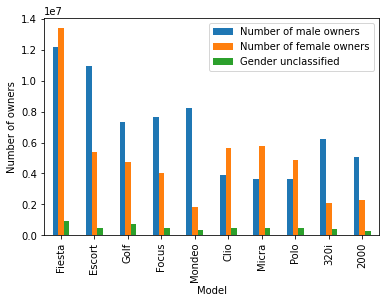

In [217]:
import matplotlib.pyplot as plt
df.plot(x= "Model", y=["Number of male owners", "Number of female owners", "Gender unclassified"],kind="bar")
plt.ylabel('Number of owners')

## Task 2.2

Text(0, 0.5, 'BHP of car')

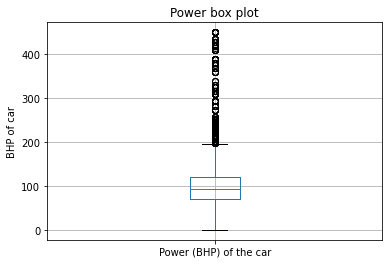

In [218]:
cleaned_car_buyers.boxplot('Power (BHP) of the car')
plt.title('Power box plot')
plt.ylabel('BHP of car')

Text(0, 0.5, 'Price in dollars')

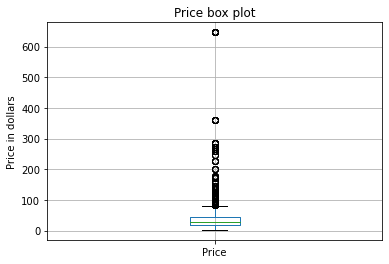

In [219]:
cleaned_car_buyers.boxplot('Price')
plt.title('Price box plot')
plt.ylabel('Price in dollars')

## Task 2.3

Text(0.5, 1.0, 'Male - Engine size relationship')

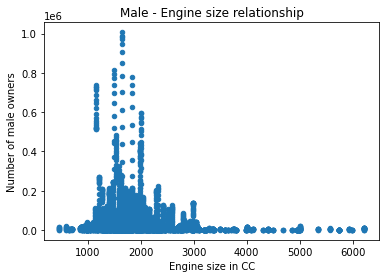

In [220]:
cleaned_car_buyers.plot(kind='scatter',y='Number of male owners',x='Engine size in CC')
plt.title('Male - Engine size relationship')

Text(0.5, 1.0, 'Male - Transmission relationship')

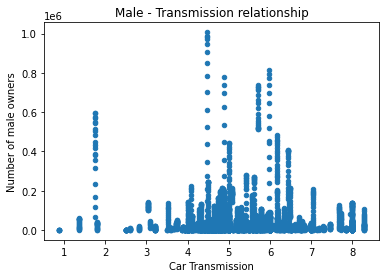

In [221]:
import matplotlib.pyplot as plt
cleaned_car_buyers.plot(kind='scatter',y='Number of male owners',x='Car Transmission')
plt.title('Male - Transmission relationship')

Text(0.5, 1.0, 'Male - Fuel relationship')

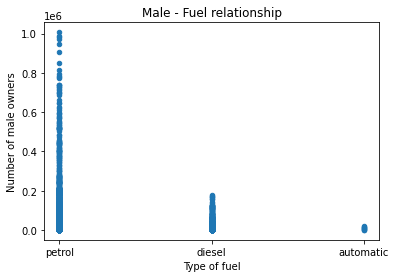

In [222]:
cleaned_car_buyers.plot(kind='scatter',y='Number of male owners',x='Type of fuel')
plt.title('Male - Fuel relationship')